# Figure 9: Experiment 3, Cardiac Temporal Phase ($\sigma_{\phi}$),
This notebook is used to recreate Figure 2, showing the temporal phase [$\sigma_{\phi}$] results for the neuroimaging data in Experiment 1. The data acquired has the following dimensions:
 1. X = 128
 2. Y = 100
 3. Slices = 3
 4. Diffusion directions [b=0 + $G_x$, $G_y$, $G_z$] = 4
 5. Repetitions = 5
 6. Mid-Systolic Timepoint = 1 Trigger Delay 
 
A user can selcet the volunteer, slice, and diffusion direction to then compute the temporal phase for a given grouping of images (Fig. 9A). The user can also select the slice and diffusion direction to plot the mean temporal phase variation for a given diffusion direction and slice (Fig. 9B). These are the same steps that are used to create Supplementary Figures. 

The last portion of the code shows heatmaps so a user can test signifiance between different different motion compensation levels and different slices. 

Contact for questions:\
Ariel Hannum\
ahannum@stanford.edu\
Stanford University

# Figure 9A: $\sigma_{\phi}$ Images for a Given Volunteer, Slice, Diffusion Direction

In [1]:
# Import utilities
from cmcrameri import cm
from helper_phase_utils_heart import *
from matplotlib import pyplot as plt
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.widgets import Slider,RadioButtons,CheckButtons
import numpy as np
import pandas as pd
import tkinter as tk
import seaborn as sns


/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
# Load data
directory = '/Users/arielhannum/Documents/Stanford/CMR-Setsompop/Projects/Phase/Data/Heart' 
color = cm.lajolla_r


In [3]:
volunteers = np.arange(10)
# Set up the initial volunteer
initial_volunteer = 1
volunteer = 1
slice = 0
diffusion = 0

# Load the initial images
initial_image_m0, __, initial_mag_m0, initial_mask_m0  = load_image(0, volunteers[initial_volunteer], diffusion, slice, directory)
initial_image_m1, __, initial_mag_m1, initial_mask_m1  = load_image(1, volunteers[initial_volunteer], diffusion, slice, directory)
initial_image_m2, __, initial_mag_m2, initial_mask_m2  = load_image(2, volunteers[initial_volunteer], diffusion, slice, directory)

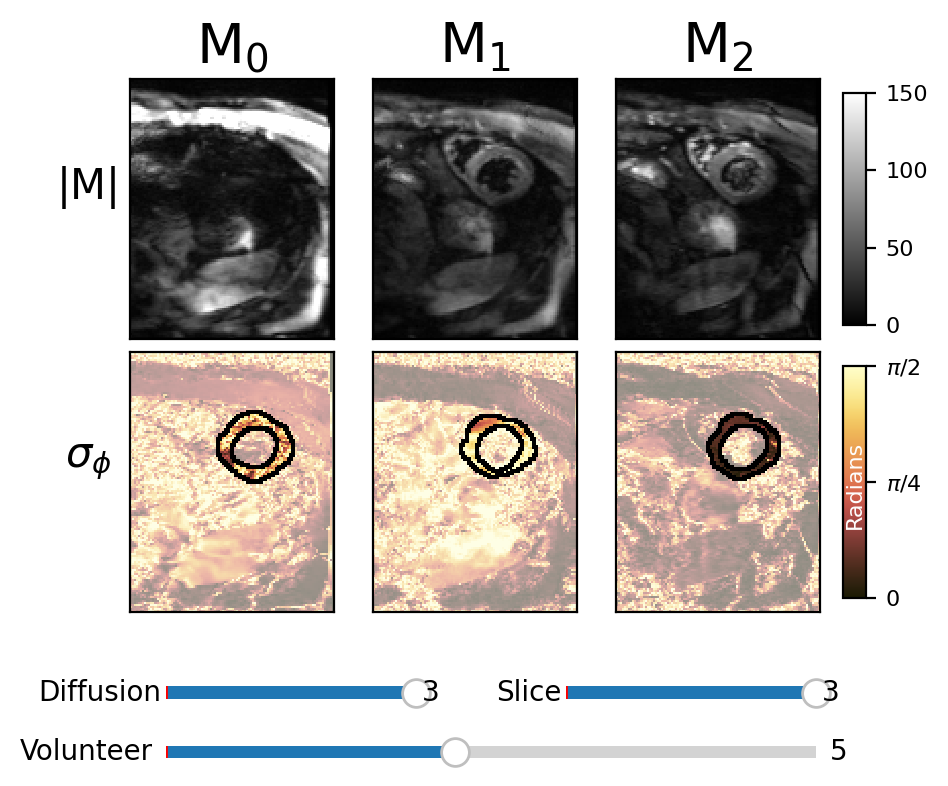

In [4]:

# Function to update the heatmap based on the slider value
def update_heatmap():

    # Load images for the timepoint 
    image_m0, __, mag_m0, mask_m0  = load_image(0,  volunteer, diffusion, slice, directory)
    image_m1, __, mag_m1, mask_m1  = load_image(1, volunteer, diffusion, slice, directory)
    image_m2, __, mag_m2, mask_m2  = load_image(2,  volunteer, diffusion, slice, directory)

    #update the background image
    background[0].set_data(image_m0)
    background[1].set_data(image_m1)
    background[2].set_data(image_m2)

    #update the main image
    images[0].set_data(image_m0*mask_m0)
    images[1].set_data(image_m1*mask_m1)
    images[2].set_data(image_m2*mask_m2)

    #update the tracing 
    masks[0].set_data(get_edge(np.nan_to_num(mask_m0)))
    masks[1].set_data(get_edge(np.nan_to_num(mask_m1)))
    masks[2].set_data(get_edge(np.nan_to_num(mask_m2)))

    # update the magnitude images
    mag[0].set_data(mag_m0)
    mag[1].set_data(mag_m1)
    mag[2].set_data(mag_m2)

    # Redraw the figure
    canvas.draw()

# Function to update figure based on diffusion direction
def change_diffusion(val):
    global diffusion,type
    diffusion = int(slider_diff.val)
    #diffusion = 0 if type == 'b=0' else 1 if type == 'G_x' else 2 if type == 'G_y' else 3
    update_heatmap()

# Function to update figure based on slice position
def change_slice(val):
    global slice
    slice = int(slider_slice.val)-1
    update_heatmap()


# Function to update figure based on slice position
def change_volunteer(val):
    global volunteer
    volunteer = int(slider_volunteer.val)
    update_heatmap()


# Create a Tkinter window
window = tk.Tk()

# Create a figure and axis for the bar and slider
fig, ax = plt.subplots(2, 3, figsize=(5,16), dpi = 200, sharey=True,sharex = True)
plt.subplots_adjust(bottom=0.25,wspace=0.001, hspace=0.05)

# Plot the initial images for the first timepoint
# Initialize the plot elements
images = [None, None, None]
masks = [None, None, None]
background = [None, None, None]
mag = [None, None, None]

background[0] = ax[1,0].imshow(initial_image_m0,vmin = 0,vmax = math.pi/2,cmap =color,alpha = 0.5,interpolation = 'nearest')
background[1] = ax[1,1].imshow(initial_image_m1,vmin = 0,vmax = math.pi/2,cmap =color,alpha = 0.5,interpolation = 'nearest')
background[2] = ax[1,2].imshow(initial_image_m2,vmin = 0,vmax = math.pi/2,cmap =color,alpha = 0.5,interpolation = 'nearest')

images[0] = ax[1,0].imshow(initial_image_m0*initial_mask_m0,vmin = 0,vmax = math.pi/2,cmap =color,interpolation = 'nearest')
images[1] = ax[1,1].imshow(initial_image_m1*initial_mask_m1,vmin = 0,vmax = math.pi/2,cmap =color,interpolation = 'nearest')
images[2] = ax[1,2].imshow(initial_image_m2*initial_mask_m2,vmin = 0,vmax = math.pi/2,cmap =color,interpolation = 'nearest')

masks[0] = ax[1,0].imshow(get_edge(np.nan_to_num(initial_mask_m0)),vmin = 0,vmax = 1,cmap ='gray_r',interpolation = 'nearest')
masks[1] = ax[1,1].imshow(get_edge(np.nan_to_num(initial_mask_m1)),vmin = 0,vmax = 1,cmap ='gray_r',interpolation = 'nearest')
masks[2] = ax[1,2].imshow(get_edge(np.nan_to_num(initial_mask_m2)),vmin = 0,vmax = 1,cmap ='gray_r',interpolation = 'nearest')

mag[0] = ax[0,0].imshow(initial_mag_m0,vmin = 0,vmax = 150,cmap ='gray',interpolation = 'nearest')
mag[1] = ax[0,1].imshow(initial_mag_m1,vmin = 0,vmax = 150,cmap ='gray',interpolation = 'nearest')
mag[2] = ax[0,2].imshow(initial_mag_m2,vmin = 0,vmax = 150,cmap ='gray',interpolation = 'nearest')

# Set titles and labels 
ax[0,0].set_title('M$_0$',size = 20)
ax[0,1].set_title('M$_1$',size = 20)
ax[0,2].set_title('M$_2$',size = 20)

for jj in range(2):
    for ii in range(3):
        ax[jj,ii].get_xaxis().set_ticks([])
        ax[jj,ii].get_yaxis().set_ticks([])

ax[0, 0].set_ylabel('|M|',rotation = 0, labelpad=15,size = 15)
ax[1, 0].set_ylabel('$\sigma_{\phi}$',rotation = 0, labelpad=15,size = 15)

# Create colorbars for each row
cbar1 = fig.colorbar(mag[0], ax=ax[0, :],fraction=0.03, pad=0.03,aspect = 10,ticks = [0,50,100,150])
cbar2 = fig.colorbar(images[0], ax=ax[1, :],fraction=0.03, pad=0.03,aspect = 10,ticks = [0,math.pi/4,math.pi/2])

label_text = 'Radians'
cbar2.ax.text(0.5, 0.3, label_text, transform=cbar2.ax.transAxes,
    ha='center', va='bottom',rotation=90,color = 'white',size = 8)


cbar1.ax.set_yticklabels([0,50,100,150],size =8, rotation = 0) 
cbar2.ax.set_yticklabels(['0', '$\pi/4$', '$\pi/2$'],size =8, rotation = 0) 

# Create a slider for the diffusion
slider_ax_diff = plt.axes([0.2, 0.14, 0.25, 0.03], facecolor='lightgray')
slider_diff = Slider(slider_ax_diff, 'Diffusion', 0, 3, valinit=0, valstep=1)

# Create a slider for the slices
slider_ax_slice = plt.axes([0.6, 0.14, 0.25, 0.03], facecolor='lightgray')
slider_slice = Slider(slider_ax_slice, 'Slice', 1, 3, valinit=0, valstep=1)

# Create a slider for the volunteer 
slider_ax_volunteer = plt.axes([0.2, 0.07, 0.65, 0.03], facecolor='lightgray')
slider_volunteer = Slider(slider_ax_volunteer, 'Volunteer', 1, 10, valinit=0, valstep=1)


# Attach the update_heatmap function to the slider's on_changed event

slider_diff.on_changed(change_diffusion)
slider_slice.on_changed(change_slice)
slider_volunteer.on_changed(change_volunteer)


# Create a Tkinter canvas and add the figure to it
canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().pack()


# Start the Tkinter event loop
window.mainloop()



# Figure 9B: $\sigma_{\phi}$ Line Plots for a given slice and diffusion direction comparing M0, M1, and M2

In [5]:
# Import utilities
from cmcrameri import cm
from helper_phase_utils_heart import *
from matplotlib import pyplot as plt
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.widgets import Slider,RadioButtons,CheckButtons
import numpy as np
import pandas as pd
import tkinter as tk
import seaborn as sns

In [6]:
# Set background style of plots
sns.set(style='darkgrid', palette='Set2')
# Load data
directory = '/Users/arielhannum/Documents/Stanford/CMR-Setsompop/Projects/Phase/Data/Heart' #'/Volumes/T7/phase_data/Brain'
color = cm.lajolla_r


In [7]:
# List the index of volunteers you want to see plotted 
list_vols = np.arange(1,11)
# Load and Compute the net mean and standard deviation of the temporal phase variation (this can take up to 2 minutes)
m0_mean = get_tempPhs_net_meanstd(directory,list_vols,0)
m1_mean = get_tempPhs_net_meanstd(directory,list_vols,1)
m2_mean = get_tempPhs_net_meanstd(directory,list_vols,2)
std_all = np.stack((m0_mean,m1_mean,m2_mean),axis = -1)

Calculating Net Temporal Phase Std. Deviation for Motion 0
Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10
Calculating Net Temporal Phase Std. Deviation for Motion 1
Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10
Calculating Net Temporal Phase Std. Deviation for Motion 2
Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10


In [8]:
print(std_all.shape)

(3, 4, 10, 3)


Traceback (most recent call last):
  File "/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 304, in process
    func(*args, **kwargs)
  File "/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/matplotlib/widgets.py", line 601, in <lambda>
    return self._observers.connect('changed', lambda val: func(val))
  File "<ipython-input-9-1b4676649e2f>", line 111, in change_config
    update_plot()
  File "<ipython-input-9-1b4676649e2f>", line 45, in update_plot
    ax[0].set_title('M0',rotation = 0, size = 10)
AttributeError: 'numpy.ndarray' object has no attribute 'set_title'
Traceback (most recent call last):
  File "/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 304, in process
    func(*args, **kwargs)
  File "/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/matplotlib/widgets.py", line 601, in <lambda>
    return self._observers.connect('changed', lambda val: func(val))

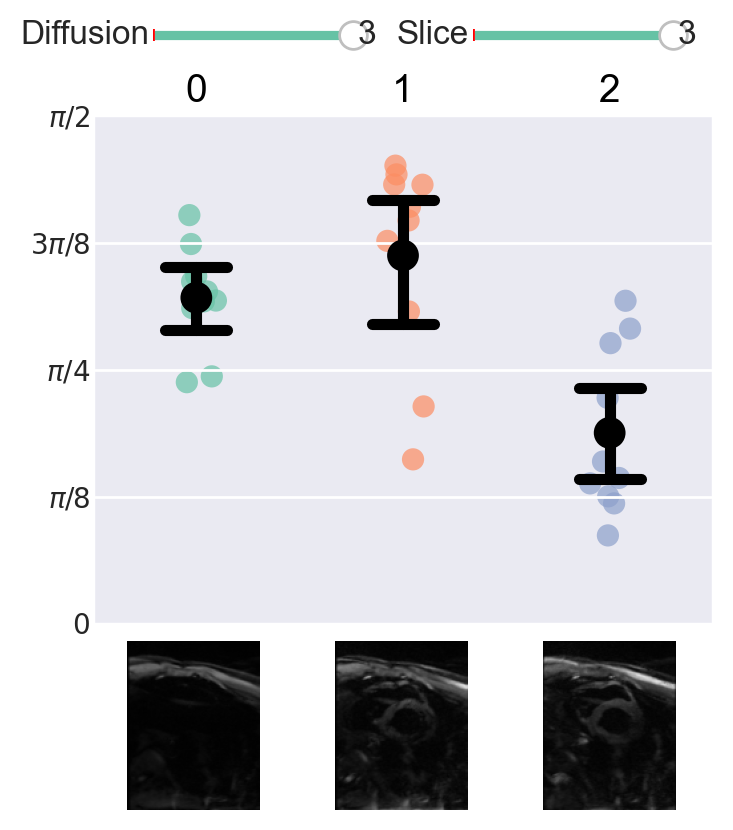

In [9]:
def update_plot():
    data = pd.DataFrame(std_all[slice,diffusion,:,:])
    axes.clear()
    # Update Axis labeling 
    axes.tick_params(axis='y', which='major', labelsize=10)
    axes.tick_params(axis='x', which='major', labelsize=10)
    axes.set_yticks([0,math.pi/8,math.pi/4,3*math.pi/8,math.pi/2])
    axes.set_yticklabels(['$0$','$\pi/8$','$\pi/4$','$3\pi/8$','$\pi/2$'],size = 10,rotation = 0)
    axes.set_ylim([0,math.pi/2])
    axes.tick_params(pad=-5)
    axes.set_xlim([-0.2,2.2])
    axes.xaxis.tick_top()
    axes.xaxis.set_label_position('top')
    axes.set_xticks([0,1,2])
    axes.tick_params(axis = 'x',length = 0, pad=2)
    axes.set_xticklabels(['M0','M1','M2'],size = 14,color = 'black',rotation = 0)


    # Plot the stripplot
    sns.stripplot(data=data,color = 'black',
        size = 8,zorder = 0,edgecolor='gray', ax = axes,palette='Set2',alpha = 0.7)

    # Plot the mean per volunteer
    sns.pointplot(
        data=data,color = 'black',errwidth=4,scale = 1.3,
        errorbar=("se",data), capsize=.3, join=False, orient ='v',ax=axes,
    )
    # Update Image
    # Use an example volunteer as reference image
    image_ax.clear()
    __, __, image, __  = load_image(0, 1, diffusion, slice, directory)
    image_ax.imshow(image,cmap = 'gray',vmin = 0,vmax = 500)
    mag = image_ax.axis("off")

    image_ax1.clear()
    __, __, image, __  = load_image(1, 1, diffusion, slice, directory)
    image_ax1.imshow(image,cmap = 'gray',vmin = 0,vmax = 150)
    mag = image_ax1.axis("off")

    image_ax2.clear()
    __, __, image, __  = load_image(2, 1, diffusion, slice, directory)
    image_ax2.imshow(image,cmap = 'gray',vmin = 0,vmax = 150)
    mag = image_ax2.axis("off")

    ax[0].set_title('M0',rotation = 0, size = 10)
    ax[1].set_title('M1',rotation = 0, size = 10)
    ax[2].set_title('M2',rotation = 0, size = 10)


    # Update the plot
    canvas.draw()

# Create a Tkinter window
window = tk.Tk()

# Create a figure and axis for the bar and slider
fig, axes = plt.subplots(1, 1, figsize=(4, 9), dpi = 200, sharey=True,sharex = True)
plt.subplots_adjust(bottom=0.25,wspace=0.03, hspace=0.01,top=0.85,)

# Plot the mean and standard deviation of phase
colors = sns.color_palette("colorblind",3)
colors = sns.color_palette("Set2",3)

# Default Plot Create
diffusion = 0
slice = 0
data = pd.DataFrame(std_all[slice,diffusion,:,:])
# Set axis 
axes.tick_params(axis='y', which='major', labelsize=10)
axes.tick_params(axis='x', which='major', labelsize=10)
axes.set_yticks([0,math.pi/8,math.pi/4,3*math.pi/8,math.pi/2])
axes.set_yticklabels(['$0$','$\pi/8$','$\pi/4$','$3\pi/8$','$\pi/2$'],size = 10,rotation = 0)
axes.set_ylim([0,math.pi/2])
axes.tick_params(pad=-5)
axes.set_xlim([-0.2,2.2])
axes.xaxis.tick_top()
axes.xaxis.set_label_position('top')
axes.set_xticks([0,1,2])
axes.tick_params(axis = 'x',length = 0, pad=2)
axes.set_xticklabels(['M0','M1','M2'],size = 14,color = 'black',rotation = 0)

axes.set_ylabel('$\sigma_{\phi}$ [Radians]',rotation = 90, labelpad=-2,size = 10)




# Plot the stripplot
sns.stripplot(data=data,color = 'black',
    size = 8,zorder = 0,edgecolor='gray', ax = axes,palette='Set2',alpha = 0.7)

# Plot the mean per volunteer
sns.pointplot(
    data=data,color = 'black',errwidth=4,scale = 1.2,
    errorbar=("se",data), capsize=.3, join=False, orient ='v',ax=axes,
)
        
# Create a slider for the slices
slider_ax = plt.axes([0.6, 0.93, 0.25, 0.03], facecolor='lightgray')
slider = Slider(slider_ax, 'Slice', 1, 3, valinit=0, valstep=1)

# Create a slider for the slices
slider_ax_diff = plt.axes([0.2, 0.93, 0.25, 0.03], facecolor='lightgray')
slider_diff = Slider(slider_ax_diff, 'Diffusion', 0, 3, valinit=0, valstep=1)


# Function to update figure based on diffusion direction
def change_config(val):
    global diffusion,slice
    diffusion = int(slider_diff.val) 
    slice= int(slider.val)-1
    update_plot()


# Attach the update_heatmap function to the slider's on_changed event
slider.on_changed(change_config)
slider_diff.on_changed(change_config)

# Add an  M0 image outside the subplots
image_ax = fig.add_axes([0.15, 0.03, 0.2, 0.2])  # Adjust the coordinates as needed
# Use an example volunteer as reference image
__, __, image, __  = load_image(0, 1, diffusion, slice, directory)
image_ax.imshow(image,cmap = 'gray',vmin = 0,vmax = 150)
mag = image_ax.axis("off")

# Add an M1 image outside the subplots
image_ax1 = fig.add_axes([0.41, 0.03, 0.2, 0.2])  # Adjust the coordinates as needed
# Use an example volunteer as reference image
__, __, image, __  = load_image(1, 1, diffusion, slice, directory)
image_ax1.imshow(image,cmap = 'gray',vmin = 0,vmax = 150)
mag = image_ax1.axis("off")

# Add an M1 image outside the subplots
image_ax2 = fig.add_axes([0.67, 0.03, 0.2, 0.2])  # Adjust the coordinates as needed
# Use an example volunteer as reference image
__, __, image, __  = load_image(2, 1, diffusion, slice, directory)
image_ax2.imshow(image,cmap = 'gray',vmin = 0,vmax = 150)
mag = image_ax2.axis("off")

# Create a Tkinter canvas and add the figure to it
canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().pack()

# Start the Tkinter event loop
window.mainloop()


# Figure Supplement: Statistical Testing Results for $\sigma_{\phi}$ Represented as heatmaps
Can vary diffusion direction and slice shown 

In [1]:
# Import utilities
from cmcrameri import cm
from helper_phase_utils_heart import *
from matplotlib import pyplot as plt
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.widgets import Slider,RadioButtons,CheckButtons
from matplotlib.colors import BoundaryNorm, ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
import scikit_posthocs as sp
from scipy import stats
import tkinter as tk

/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
sns.set(style='darkgrid', palette='Set2')
# Load data
directory = '/Users/arielhannum/Documents/Stanford/CMR-Setsompop/Projects/Phase/Data/Heart' #'/Volumes/T7/phase_data/Brain'
color = cm.lajolla_r

# List the index of volunteers you want to see plotted 
list_vols = [1,2,3,4,5,6,7,8,9,10]
# Load and Compute the net mean and standard deviation of the temporal phase variation 
m0_mean = get_tempPhs_net_meanstd(directory,list_vols,0)
m1_mean = get_tempPhs_net_meanstd(directory,list_vols,1)
m2_mean = get_tempPhs_net_meanstd(directory,list_vols,2)

mean_combo = np.stack((m0_mean,m1_mean,m2_mean),axis = -1)
print(mean_combo.shape)

Calculating Net Temporal Phase Std. Deviation for Motion 0
Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10
Calculating Net Temporal Phase Std. Deviation for Motion 1
Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10
Calculating Net Temporal Phase Std. Deviation for Motion 2
Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10
(3, 4, 10, 3)


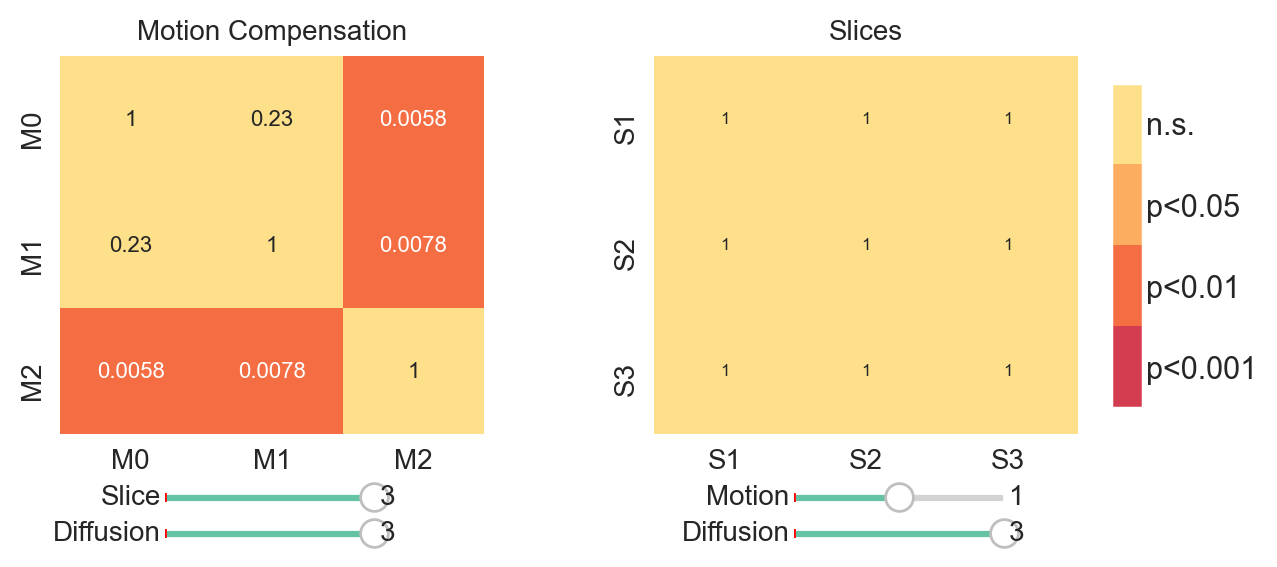

In [17]:
# Create Colormap and Ranges
my_colors = [sns.color_palette("Spectral",9)[0], sns.color_palette("Spectral",9)[1], sns.color_palette("Spectral",9)[2], 
            sns.color_palette("Spectral",9)[3]]
my_cmap = ListedColormap(my_colors)
bounds = [0, 0.001, 0.01, 0.05,1]
my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))

# Create a Tkinter window
window = tk.Tk()

# Create a figure and axis for the bar and slider
fig, ax = plt.subplots(1, 2, figsize=(8, 3), dpi = 200)
plt.subplots_adjust(bottom=0.25,wspace=0.4, hspace=0.01)

# Plot the initial images for the first timepoint
# Initialize the plot elements
line = [None, None, None]
fill = [None, None, None]

# Plot the mean and standard deviation of phase
colors = sns.color_palette("colorblind",3)
colors = sns.color_palette("Set2",3)

# Default Plot Create
diffusion = 0
slice = 0
td=0

hypothesis = compute_statistics_motionComp(mean_combo[slice,diffusion,:,:],0.05)
check = np.sum(np.int32(np.isnan(hypothesis)))
if  check==9:
    hypothesis = np.ones((3,3))

plot = sns.heatmap(hypothesis,ax = ax[0], annot = True, xticklabels=['M0','M1','M2'],
        yticklabels=['M0','M1','M2'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":8})

ax[0].set_title('Motion Compensation',fontsize = 10)

# Create a slider for the slices
slider_ax = plt.axes([0.2, 0.13, 0.15, 0.03], facecolor='lightgray')
slider = Slider(slider_ax, 'Slice', 1, 3, valinit=0, valstep=1)

slider_ax_diff = plt.axes([0.2, 0.07, 0.15, 0.03], facecolor='lightgray')
slider_diff = Slider(slider_ax_diff, 'Diffusion', 0, 3, valinit=0, valstep=1)


# Create colorbars for each row
cbar1 = fig.colorbar(plot.collections[0], ax=ax[:], fraction=0.03, pad=0.03, aspect=10)
cbar1.set_ticks([(0 + 0.001) / 2, (0.001 + 0.01) / 2, (0.01 + 0.05) / 2, (0.05 + 1) / 2])
cbar1.set_ticklabels(['p<0.001', 'p<0.01', 'p<0.05', 'n.s.'])

cbar1.ax.xaxis.set_ticks_position('none')  # Remove x-axis ticks
cbar1.ax.yaxis.set_ticks_position('none')  # Remove y-axis ticks
cbar1.ax.tick_params(pad=-5)

# Adjust the tick parameters
for ii in range(2):
    ax[ii].tick_params(axis='x', which='both', bottom=False, top=False, labelsize=10, pad=-1)
    ax[ii].tick_params(axis='y', which='both', left=False, right=False, labelsize=10, pad=-1)

# Function to update figure 1 based on slice location
def change_slice(val):
    global slice
    slice = int(slider.val)-1
    update_heatmap()

# Function to update figure 1 based on diffusion direction
def change_diffusion(val):
    global diffusion
    diffusion = int(slider_diff.val)
    update_heatmap()


# Function to update the first heatmap
def update_heatmap():
    ax[0].clear()
    hypothesis = compute_statistics_motionComp(mean_combo[slice,diffusion,:,:],0.05)
    check = np.sum(np.int32(np.isnan(hypothesis)))
    if  check==9:
        hypothesis = np.ones((3,3))
    plot = sns.heatmap(hypothesis,ax = ax[0], annot = True, xticklabels=['M0','M1','M2'],
        yticklabels=['M0','M1','M2'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":8})
    ax[0].set_title('Motion Compensation',fontsize = 10)


# Attach the update_heatmap function to the slider's on_changed event for subplot 1
slider.on_changed(change_slice)
slider_diff.on_changed(change_diffusion)


##############################################################################################################
# Function to update the second heatmap
def update_heatmap2():
    ax[1].clear()
    hypothesis = compute_statistics_slices(mean_combo[:,diffusion,:,motion],0.05)
    check = np.sum(np.int32(np.isnan(hypothesis)))
    if  check==3**2:
        hypothesis = np.ones((3,3))
    plot = sns.heatmap(hypothesis,ax = ax[1], annot = True, xticklabels=['S1','S2','S3'],
        yticklabels=['S1','S2','S3'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":6})
    ax[1].set_title('Slices',fontsize = 10)
    

# Function to update subplot 2 based on variables
def change_val(val):
    global motion,td,diffusion
    motion = int(slider_motion1.val)
    td = int(slider_time2.val)
    diffusion = int(slider_diff2.val)
    update_heatmap2()

# Create Sliders for motion and diffusion
slider_ax_motion = plt.axes([0.65, 0.13, 0.15, 0.03], facecolor='lightgray')
slider_motion1 = Slider(slider_ax_motion, 'Motion', 0, 2, valinit=0, valstep=1)


slider_ax_diff = plt.axes([0.65, 0.07, 0.15, 0.03], facecolor='lightgray')
slider_diff2 = Slider(slider_ax_diff, 'Diffusion', 0, 3, valinit=0, valstep=1)

# Update figure when changed 
slider_motion1.on_changed(change_val)
slider_diff2.on_changed(change_val)

# Initial Heatmap
diffusion = 0
td = 0
motion = 0
ax[1].clear()
hypothesis = compute_statistics_slices(mean_combo[:,diffusion,:,motion],0.05)
check = np.sum(np.int32(np.isnan(hypothesis)))
if  check==3**2:
    hypothesis = np.ones((3,3))
plot = sns.heatmap(hypothesis,ax = ax[1], annot = True, xticklabels=['S1','S2','S3'],
    yticklabels=['S1','S2','S3'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":6})
ax[1].set_title('Slices',fontsize = 10)


##############################################################################################################
# Create a Tkinter canvas and add the figure to it
canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().pack()

# Start the Tkinter event loop
window.mainloop()